In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_salaries = pd.read_csv('/content/drive/MyDrive/Sampel Data/DataSet/ds_salaries.csv')
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Exploratory Data Analysis (EDA)


## 1.1 Check Null Values

In [ ]:
df_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 1.2 Check Duplicate Data

In [ ]:
duplicate_rows_shape = df_salaries[df_salaries.duplicated()]
print("Number of Duplicate", duplicate_rows_shape.shape)

Number of Duplicate (1171, 11)


In [ ]:
data = df_salaries.drop_duplicates()
data.shape

(2584, 11)

## 1.3 Check Unique Values in Each Column

In [ ]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
for column in data.columns:
  if data[column].dtypes == object:

    num_distinc_values = data[column].nunique() #jumlah
    distinc_values = data[column].unique() #jenis

    # print(column + ':' + str(num_distinc_values) + '->' , end='')
    # print(distinc_values)
    print(f"{column} : {num_distinc_values} -> {distinc_values}\n")

experience_level : 4 -> ['SE' 'MI' 'EN' 'EX']

employment_type : 4 -> ['FT' 'CT' 'FL' 'PT']

job_title : 93 -> ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scie

## 1.4 Rename value for Better Understanding

In [ ]:
data['experience_level'] = data['experience_level'].replace({
    'SE':'Senior',
    'EN':'Entry Level',
    'EX':'Executive Level',
    'MI':'Mid/Intermediate Level'
})
data['employment_type'] = data['employment_type'].replace({
    'FL' :'Frelancer',
    'CT' : 'Contractor',
    'FT' : 'Full-Time',
    'PT' : 'Part-Time'
})
data['remote_ratio'] = data['remote_ratio'].replace({
    0 : 'On-Site',
    50 : 'Half-Remote',
    100 : 'Full-Remote'
})

<ipython-input-12-e6d94dc49640>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience_level'] = data['experience_level'].replace({
<ipython-input-12-e6d94dc49640>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['employment_type'] = data['employment_type'].replace({
<ipython-input-12-e6d94dc49640>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L
3751,2021,Mid/Intermediate Level,Full-Time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L
3752,2020,Entry Level,Full-Time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L


## 1.5 Job Title

In [ ]:
# print(data['job_title.nunique'].nunique())
data['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [ ]:
data.job_title

0       Principal Data Scientist
1                    ML Engineer
2                    ML Engineer
3                 Data Scientist
4                 Data Scientist
                  ...           
3750              Data Scientist
3751    Principal Data Scientist
3752              Data Scientist
3753       Business Data Analyst
3754        Data Science Manager
Name: job_title, Length: 2584, dtype: object

In [ ]:
def assign_broader_category(job_title):
  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
  data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
  machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
  management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

  if job_title in data_engineering:
    return "Data Engineering"
  if job_title in data_scientist:
    return "Data Scientist"
  if job_title in machine_learning:
    return "Machine Learning"
  if job_title in data_architecture:
    return "Data Architecture"
  if job_title in management:
    return "management"
  else:
    return "Others"

data.loc[:,'job_category'] = data['job_title'].apply(assign_broader_category) #:, row awal sampai akhir

<ipython-input-16-203d159da251>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'job_category'] = data['job_title'].apply(assign_broader_category) #:, row awal sampai akhir


In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Others
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist
3751,2021,Mid/Intermediate Level,Full-Time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Others
3752,2020,Entry Level,Full-Time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering


## 1.6 Adjust Salary to Present Value

In [ ]:
# Inflation rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}
global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}

#Function to Adjust Salary
def adjust_salary(row):
  year = row['work_year']
  original_salary = row['salary_in_usd']
  currency = row['salary_currency']

  if year == 2023:
    return original_salary
  else:
    adjusted_salary = original_salary

    for y in range (year,2023) :
      if currency == 'USD':
        inflation_rate = us_inflation_rates[y]
      else:
        inflation_rate = global_inflation_rates[y]

      adjusted_salary = adjusted_salary * (1 + inflation_rate)

    return adjusted_salary

In [ ]:
data['adjusted_salary'] = data.apply(adjust_salary, axis=1) #.apply Along an axis of the DF

<ipython-input-19-c26b86e55086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['adjusted_salary'] = data.apply(adjust_salary, axis=1) #.apply Along an axis of the DF


In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Others,85847.000000
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning,30000.000000
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning,25500.000000
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist,175000.000000
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist,120000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist,465053.312718
3751,2021,Mid/Intermediate Level,Full-Time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Others,168373.305000
3752,2020,Entry Level,Full-Time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist,118520.868532
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering,112877.017650


## 1.7 Job Distribution

In [ ]:
value_counts = data['job_category'].value_counts(normalize=True) * 100
value_counts

Data Engineering     44.156347
Data Scientist       24.729102
Others               15.402477
Machine Learning      9.442724
management            3.637771
Data Architecture     2.631579
Name: job_category, dtype: float64

Text(0, 0.5, 'Job Category')

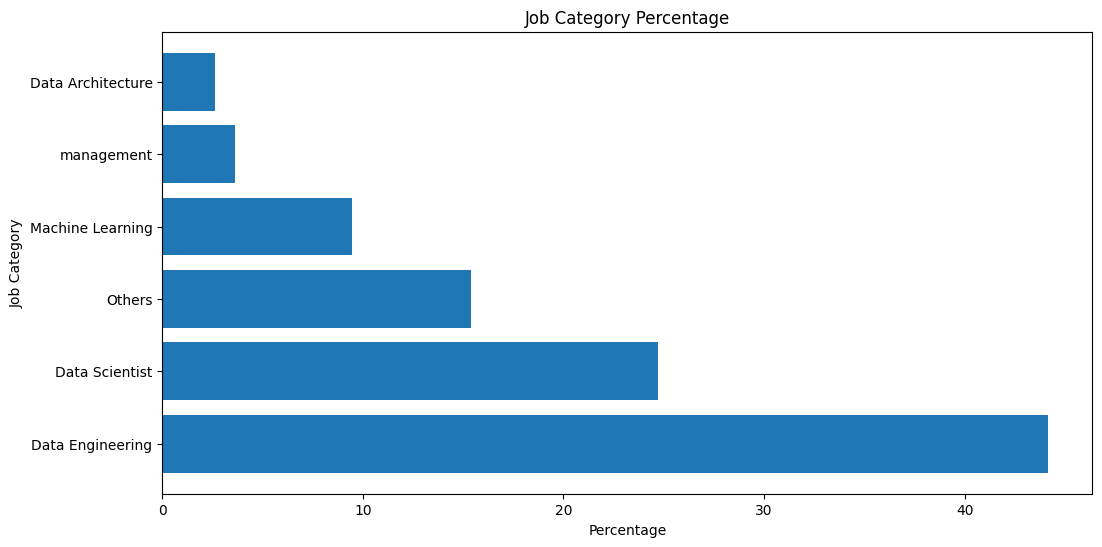

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.barh(value_counts.index, value_counts.values)
ax.set_title('Job Category Percentage')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')

## 1.8 Distribution across different employment types

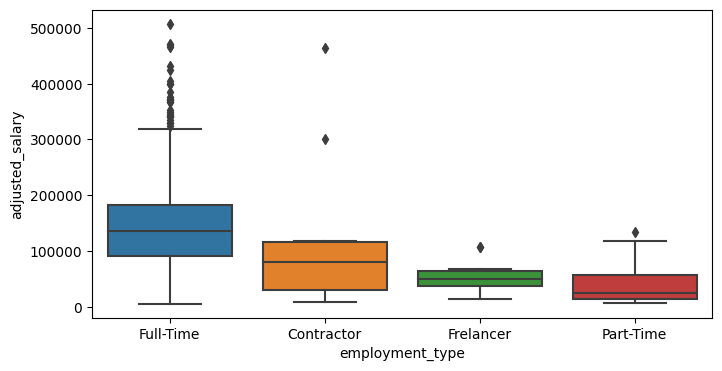

In [ ]:
plt.figure(figsize=(8,4)) #(x,y) x = panjang, y = lebar

sns.boxplot(data=data, x='employment_type', y='adjusted_salary')

plt.show()

## 1.9 Dsitribution Salary


In [ ]:
data['adjusted_salary']

0        85847.000000
1        30000.000000
2        25500.000000
3       175000.000000
4       120000.000000
            ...      
3750    465053.312718
3751    168373.305000
3752    118520.868532
3753    112877.017650
3754    106600.363200
Name: adjusted_salary, Length: 2584, dtype: float64

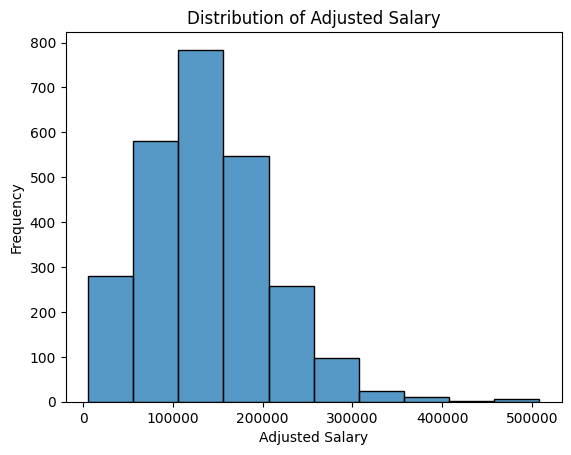

In [ ]:
sns.histplot(data['adjusted_salary'],bins=10)

plt.title('Distribution of Adjusted Salary')
plt.ylabel('Frequency')
plt.xlabel('Adjusted Salary')
plt.show()

## 1.10 Boxplot dan swarmplot of adjusted salary

<function matplotlib.pyplot.show(close=None, block=None)>

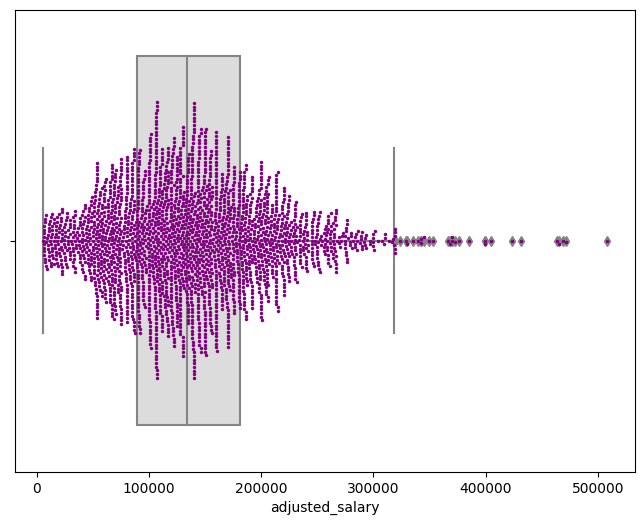

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color='purple', alpha=1, size=2.5) #alpha = Transparancy

plt.show

# 2. Answer These Questions

In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior,Full-Time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Others,85847.000000
1,2023,Mid/Intermediate Level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning,30000.000000
2,2023,Mid/Intermediate Level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning,25500.000000
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist,175000.000000
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist,120000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist,465053.312718
3751,2021,Mid/Intermediate Level,Full-Time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Others,168373.305000
3752,2020,Entry Level,Full-Time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist,118520.868532
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering,112877.017650


## Show the median adjusted data scientist salary, for each experience level

In [ ]:
data.groupby(by=['experience_level']).agg({'adjusted_salary': ['median']})

,adjusted_salary
,median
experience_level,
Entry Level,66427.06208
Executive Level,195150.00000
Mid/Intermediate Level,100000.00000
Senior,153360.00000


## Show the number of records for each company_location, sorted descending

In [ ]:
data.value_counts('company_location', ascending=False)

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
EG       1
MT       1
MK       1
MD       1
VN       1
Length: 72, dtype: int64

## - From this data, show the **median** adjusted salary of employee who works for company located in Indonesia (ID), do you think that value represents the salary in Indonesia? why? why not?

In [ ]:
data.loc[(data['company_location']=='ID')].agg({'adjusted_salary': ['median']})

,adjusted_salary
median,37045.804


In my opinion, this value does not represent salaries in Indonesia. because there are only 2 data and only 1 year period (2022), so for me the amount of data is not enough to represent the true value